In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/birva/Downloads/cleaned_masterDataset.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Get a quick description and the data types
print(data.describe())
print(data.dtypes)


                                             Subject  \
0                                           good day   
1  rescheduled dates for pros 9th annual pricing ...   
2                                          re graph2   
3                              transaction completed   
4                        2022 employee benefits plan   

                                                Body  label  Body_Length  
0  greetings i am sorry to encroach into your pri...      1          517  
1  world events and resulting airlineindustry act...      0          805  
2  please find attached the q1 q2 q3 and q4 nymex...      0          109  
3  hello advisinguvicca paypal 25feb2022 063703 a...      1         1433  
4  the employee benefits program will now be supp...      1         1267  
             label    Body_Length
count  7394.000000    7394.000000
mean      0.330809    1430.176089
std       0.470536    4550.923551
min       0.000000       1.000000
25%       0.000000     286.250000
50%      

In [3]:
# Print all column names
print(data.columns)


Index(['Subject', 'Body', 'label', 'Body_Length'], dtype='object')


In [4]:
# Print data types of each column
print(data.dtypes)


Subject        object
Body           object
label           int64
Body_Length     int64
dtype: object


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer for 'Body' and 'Subject'
tfidf_vectorizer_body = TfidfVectorizer(max_features=1000)  # Limit number of features to 1000 for simplicity
tfidf_vectorizer_subject = TfidfVectorizer(max_features=1000)

# Fit and transform the text data to numerical data
tfidf_body = tfidf_vectorizer_body.fit_transform(data['Body'])
tfidf_subject = tfidf_vectorizer_subject.fit_transform(data['Subject'])

# Convert the TF-IDF output to DataFrame for easier manipulation
tfidf_body_df = pd.DataFrame(tfidf_body.toarray(), columns=tfidf_vectorizer_body.get_feature_names_out())
tfidf_subject_df = pd.DataFrame(tfidf_subject.toarray(), columns=tfidf_vectorizer_subject.get_feature_names_out())

# Combine the TF-IDF data back to your main DataFrame
data = pd.concat([data.reset_index(drop=True), tfidf_body_df, tfidf_subject_df], axis=1)

# Drop original 'Body' and 'Subject' columns as they are now encoded
data.drop(['Body', 'Subject'], axis=1, inplace=True)


In [7]:
from sklearn.model_selection import train_test_split

# Assuming 'label' is the target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1485
           1       0.98      0.94      0.96       734

    accuracy                           0.98      2219
   macro avg       0.98      0.97      0.97      2219
weighted avg       0.98      0.98      0.98      2219

Accuracy: 0.975214060387562


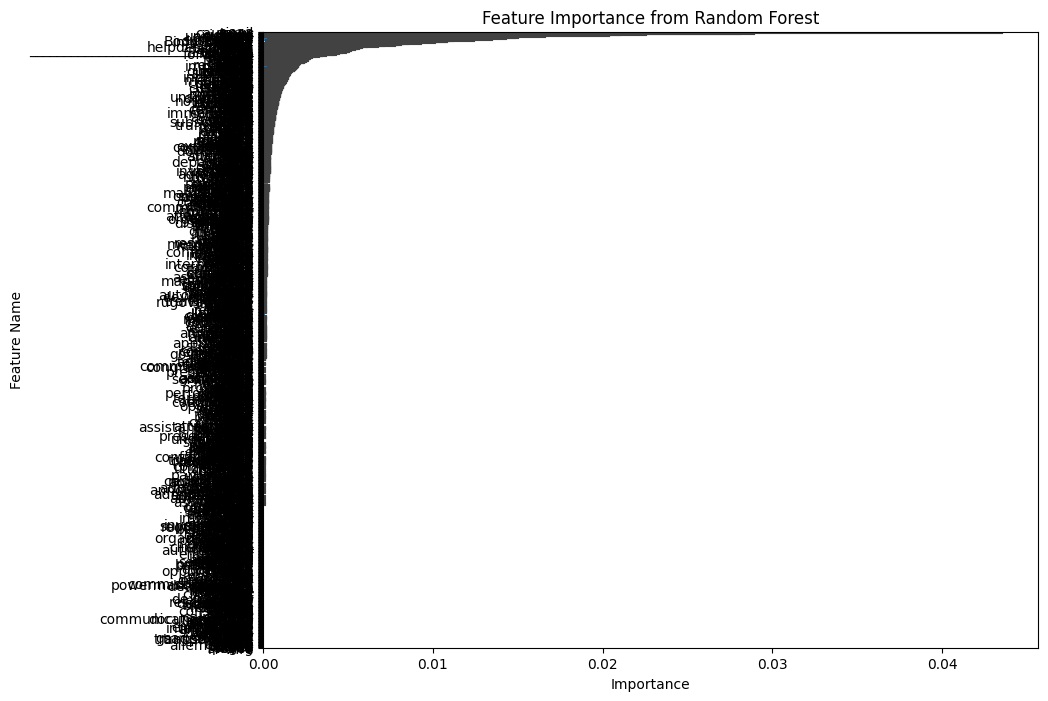

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the Random Forest model
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature Name': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature Name', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()


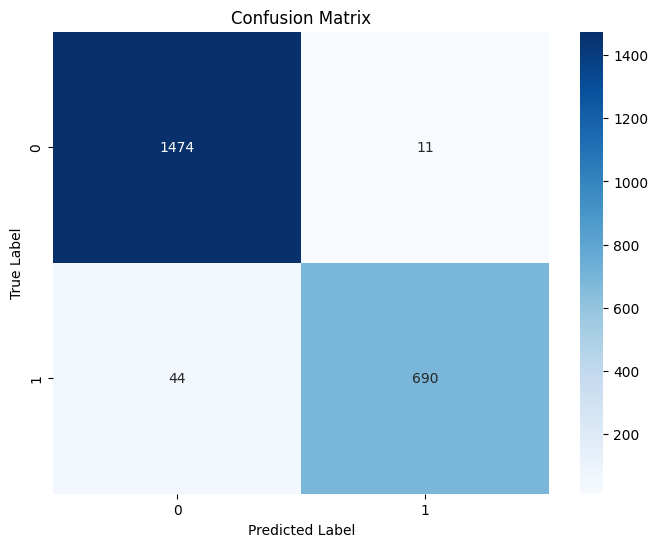

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


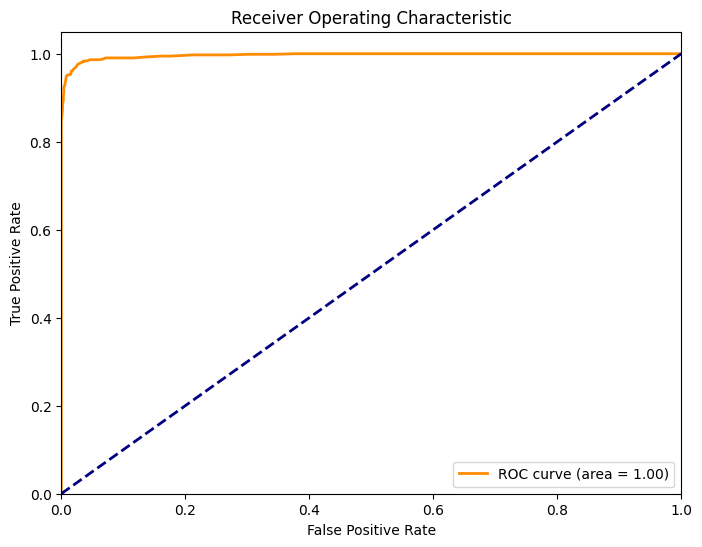

In [12]:
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities of each class
y_probs = rf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
